# Titanic passengers survival analysis

Titanic sinking was one of the most shocking transportation catastrophes in the history. Let's analyze Titanic passengers data and look for what factors could affect passengers chances to survive. The analysis will be based on classic data set available on [Kaggle](https://www.kaggle.com/c/titanic).

## 1. Questions

There are several interesting things that can be analysed.

- What was the overall survival rate among all passengers?

- How does it differ for women, men or children?

- How does it differ for crew memebers and technical staff?

- What was overall chance of survival for "mean" passenger - if there were no other factors present how big were chances for survival comparing lifeboats spots number to passengers number. In othe words - how many people had to die "by ships design".

- How many of these spots were used?

- How does being of specific deck defined chances of survival?

- What were the factors that could affect person survival chances?

- What were the features that most of passengers in lifeboats shared?

- What were the features that most of passengers who did not survive shared?

- What combination of factors gave the biggest chances for survival? And what combination for the lowest?

- Were people related or travelling together more probable to survive than those traveling alone?

- Were people relative to each other surviving together or not?

These are just initial questions I can come up with. We will later review them after wrangling some data. Let's wrangle then.


## 2. Data wrangling

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

First let's see data set description from Kaggle:

#### Data Dictionary

```
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
```

#### Variable Notes

```
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
```


In [3]:
survival_df = pd.read_csv("data/train.csv")

Let's see how the data looks like and what are its basic features after loading to a Data Frame.

In [4]:
survival_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
survival_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
survival_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 3. Data exploration

Let's first see basic mortality levels among different groups.


### 3.1 What was overall survival rate among all passengers?


Let's start by checking how many passengers records does our data set contains.

In [7]:
survival_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

There is one strange thing here. Official documentation says there were 2224 Titanic passengers and this data set contains information about only 891 of them. For now let's leave it that way and analyze available data. But we should keep in mind that there is a fraction of data we are missing in this analysis and that will need some further analysis. 

Let's then calculate the overal survival ratio for Titanic passengers.

In [8]:
survival_df_survived_grouped = survival_df.groupby("Survived")
survival_df_survived_grouped.groups

{0: Int64Index([  0,   4,   5,   6,   7,  12,  13,  14,  16,  18,
             ...
             877, 878, 881, 882, 883, 884, 885, 886, 888, 890],
            dtype='int64', length=549),
 1: Int64Index([  1,   2,   3,   8,   9,  10,  11,  15,  17,  19,
             ...
             865, 866, 869, 871, 874, 875, 879, 880, 887, 889],
            dtype='int64', length=342)}

In [9]:
survived_count = survival_df_survived_grouped.get_group(1)['Survived'].count()
not_survived_count = survival_df_survived_grouped.get_group(0)['Survived'].count()

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [197]:
def plot_survival_rate(survived_number, not_survived_number, title_group_name):
    fig, axes = plt.subplots(figsize=(8, 8))
    axes.pie([survived_number, not_survived_number], labels=["Survived", "Not survived"], 
             autopct=lambda p: '{0:.1f}%\n({1:.0f} passengers)'.format(p, p * (survived_number+not_survived_number) / 100), 
             shadow=False, startangle=90)
    axes.set_title("Titanic survived vs. not survived ratio among {}".format(title_group_name))
    axes.axis('equal');

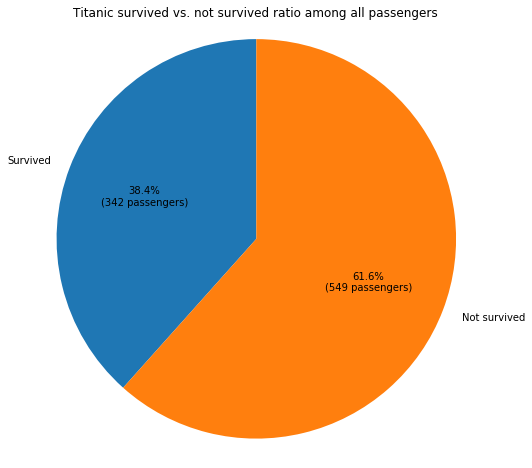

In [198]:
plot_survival_rate(survived_count, not_survived_count, "all passengers")

We can see that overal survival rate among all Titanic passengers was 38.4%.

### 3.2 What was survival rate among women and men?

Let's analyse data with data set divided among genders.

In [12]:
survival_df_sex_grouped = survival_df.groupby("Sex")
survival_df_sex_grouped.groups

{'female': Int64Index([  1,   2,   3,   8,   9,  10,  11,  14,  15,  18,
             ...
             866, 871, 874, 875, 879, 880, 882, 885, 887, 888],
            dtype='int64', length=314),
 'male': Int64Index([  0,   4,   5,   6,   7,  12,  13,  16,  17,  20,
             ...
             873, 876, 877, 878, 881, 883, 884, 886, 889, 890],
            dtype='int64', length=577)}

We have data grouped into two sexes. Let's check how big these groups were.

In [13]:
males_count = survival_df_sex_grouped.get_group("male")['PassengerId'].count()
females_count = survival_df_sex_grouped.get_group("female")['PassengerId'].count()

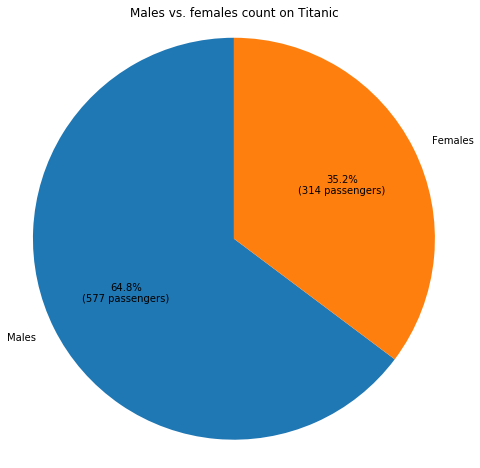

In [199]:
fig, axes = plt.subplots(figsize=(8, 8))
axes.pie([males_count, females_count], labels=["Males", "Females"], 
         autopct=lambda p: '{0:.1f}%\n({1:.0f} passengers)'.format(p, p * survival_df["PassengerId"].count() / 100), 
         shadow=False, startangle=90)
axes.set_title("Males vs. females count on Titanic")
axes.axis('equal');

We can see that Titanic passengers were 64.8% males and 35.2% females.

Now we can calculate survival ratio among these two groups.

In [15]:
survided_males_number = sum(survival_df_sex_grouped.get_group("male")["Survived"] == 1)
not_survided_males_number = sum(survival_df_sex_grouped.get_group("male")["Survived"] == 0)

survided_females_number = sum(survival_df_sex_grouped.get_group("female")["Survived"] == 1)
not_survided_females_number = sum(survival_df_sex_grouped.get_group("female")["Survived"] == 0)

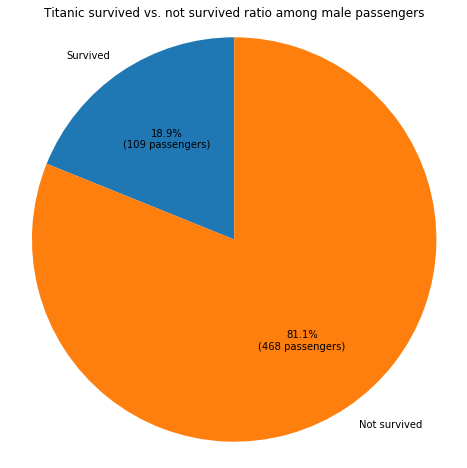

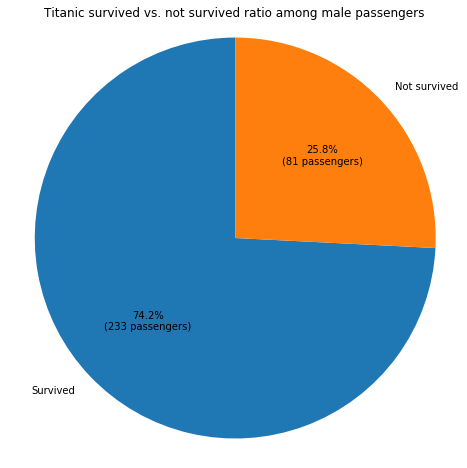

In [202]:
plot_survival_rate(survided_males_number, not_survided_males_number, "male passengers")
plot_survival_rate(survided_females_number, not_survided_females_number, "female passengers")

That is interesting but also expectable. Overal survival rate on Titanic was 38.4%. However among males it was much lower with only 18.9% and much higher among females with 74.2%. This could be expected following "Women and children first" marine code of conduct (more on it [here](https://en.wikipedia.org/wiki/Women_and_children_first)). Just by looking at the data we analyzed so far we can confirm following first half of it based on fact that survival rate was much higher among women.

The the interesting thing to check is who were these 109 males who survived: what were the factors that caused their survival considering there were still 81 women who did not entered lifeboats (not counting children). These could be children or elderly people. We will check it later when conducting age related analysis.

### 3.3 What was survival rate among different age groups.

Let's now analyze different age related analysis and check survival rate for different passengers ages.

#### Oldest and the youngest passengers.

First we will see passengers ages: youngest and oldest pasengers on board.

In [17]:
survival_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
survival_df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Among 714 passengers for whom we have the age information the mean age was 29.7 years old with standard deviation of 14. The median age was 28 years old. That is quit young age.

The youngest passenger was 5 months old (0.42 year old) and he survived - you can read his story [here](https://www.encyclopedia-titanica.org/titanic-survivor/assad-alexander-thomas-tannous.html).

In [19]:
survival_df.loc[survival_df["Age"].argmin()]

PassengerId                                804
Survived                                     1
Pclass                                       3
Name           Thomas, Master. Assad Alexander
Sex                                       male
Age                                       0.42
SibSp                                        0
Parch                                        1
Ticket                                    2625
Fare                                    8.5167
Cabin                                      NaN
Embarked                                     C
Name: 803, dtype: object

The oldest passenger was 80 years old also survived.

In [20]:
survival_df.loc[survival_df["Age"].argmax()]

PassengerId                                     631
Survived                                          1
Pclass                                            1
Name           Barkworth, Mr. Algernon Henry Wilson
Sex                                            male
Age                                              80
SibSp                                             0
Parch                                             0
Ticket                                        27042
Fare                                             30
Cabin                                           A23
Embarked                                          S
Name: 630, dtype: object

By accident we possibly found some grave error in the data. When you read Algernon Henry Wilson Barkworth biography (you can find [here](https://www.encyclopedia-titanica.org/titanic-survivor/algernon-barkworth.html)), we can read that he was born in 1864. That means that in 1912, when Titanic catastrophy happened, he was 48 years old and not 80 as stated in the data set. So why 80 in the data set? We can further read that this person died in 1945 aged 80. 

This would mean that data set ages for passengers who survived contain values of post Titanic death age and not day of catastrophy age. If it is the the latter the data would be interesting for any analysis since it would contain data comparable to the ages of those who did not survived. However if it is the former the data would be useless in terms of survival analysis since containing information non related to Titanic catastrophy.

Let's analyse a few similar cases ages - meaning ages of people who survived  - determining whether they are ages at time of catastrophy or age at later death.

In [21]:
survival_df_survived_grouped.get_group(1).head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C


In [22]:
survival_df_survived_grouped.get_group(1).loc[1]

PassengerId                                                    2
Survived                                                       1
Pclass                                                         1
Name           Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                       female
Age                                                           38
SibSp                                                          1
Parch                                                          0
Ticket                                                  PC 17599
Fare                                                     71.2833
Cabin                                                        C85
Embarked                                                       C
Name: 1, dtype: object

Born 1873, aged 38 at the time of Titanic catastrophy, died aged 1949 aged 72 years. Data set age from time of Titanic catastrophy.

In [23]:
survival_df_survived_grouped.get_group(1).loc[2]

PassengerId                         3
Survived                            1
Pclass                              3
Name           Heikkinen, Miss. Laina
Sex                            female
Age                                26
SibSp                               0
Parch                               0
Ticket               STON/O2. 3101282
Fare                            7.925
Cabin                             NaN
Embarked                            S
Name: 2, dtype: object

Born 1886, aged 26 at the time of Titanic catastrophy, died aged 1943 aged 47 years. Data set age from time of Titanic catastrophy.

In [24]:
survival_df_survived_grouped.get_group(1).loc[3]

PassengerId                                               4
Survived                                                  1
Pclass                                                    1
Name           Futrelle, Mrs. Jacques Heath (Lily May Peel)
Sex                                                  female
Age                                                      35
SibSp                                                     1
Parch                                                     0
Ticket                                               113803
Fare                                                   53.1
Cabin                                                  C123
Embarked                                                  S
Name: 3, dtype: object

Born 1876, aged 35 at the time of Titanic catastrophy, died aged 1967 aged 91 years. Data set age from time of Titanic catastrophy.

In [25]:
survival_df_survived_grouped.get_group(1).loc[8]

PassengerId                                                    9
Survived                                                       1
Pclass                                                         3
Name           Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
Sex                                                       female
Age                                                           27
SibSp                                                          0
Parch                                                          2
Ticket                                                    347742
Fare                                                     11.1333
Cabin                                                        NaN
Embarked                                                       S
Name: 8, dtype: object

Born 1884, aged 27 at the time of Titanic catastrophy, died aged 1968 aged 84 years. Data set age from time of Titanic catastrophy.

In [26]:
survival_df_survived_grouped.get_group(1).loc[9]

PassengerId                                     10
Survived                                         1
Pclass                                           2
Name           Nasser, Mrs. Nicholas (Adele Achem)
Sex                                         female
Age                                             14
SibSp                                            1
Parch                                            0
Ticket                                      237736
Fare                                       30.0708
Cabin                                          NaN
Embarked                                         C
Name: 9, dtype: object

Born 1898, aged 14 at the time of Titanic catastrophy, died aged 1970 aged 72 years. Data set age from time of Titanic catastrophy.

In [27]:
survival_df_survived_grouped.get_group(1).loc[10]

PassengerId                                 11
Survived                                     1
Pclass                                       3
Name           Sandstrom, Miss. Marguerite Rut
Sex                                     female
Age                                          4
SibSp                                        1
Parch                                        1
Ticket                                 PP 9549
Fare                                      16.7
Cabin                                       G6
Embarked                                     S
Name: 10, dtype: object

Born 1908, aged 4 at the time of Titanic catastrophy, died aged 1963 aged 55 years. Data set age from time of Titanic catastrophy.

In [28]:
survival_df_survived_grouped.get_group(1).loc[11]

PassengerId                          12
Survived                              1
Pclass                                1
Name           Bonnell, Miss. Elizabeth
Sex                              female
Age                                  58
SibSp                                 0
Parch                                 0
Ticket                           113783
Fare                              26.55
Cabin                              C103
Embarked                              S
Name: 11, dtype: object

Born 1854, aged 58 at the time of Titanic catastrophy, died aged 1936 aged 82 years. Data set age from time of Titanic catastrophy.

In [29]:
survival_df_survived_grouped.get_group(1).loc[15]

PassengerId                                  16
Survived                                      1
Pclass                                        2
Name           Hewlett, Mrs. (Mary D Kingcome) 
Sex                                      female
Age                                          55
SibSp                                         0
Parch                                         0
Ticket                                   248706
Fare                                         16
Cabin                                       NaN
Embarked                                      S
Name: 15, dtype: object

Born 1857, aged 58 at the time of Titanic catastrophy, died aged 1917 aged 60 years. Data set age from time of Titanic catastrophy.

And again the youngest and the oldest survivors.


In [30]:
survival_df.loc[survival_df["Age"].argmin()]

PassengerId                                804
Survived                                     1
Pclass                                       3
Name           Thomas, Master. Assad Alexander
Sex                                       male
Age                                       0.42
SibSp                                        0
Parch                                        1
Ticket                                    2625
Fare                                    8.5167
Cabin                                      NaN
Embarked                                     C
Name: 803, dtype: object

Born 1911, aged 0.42 at the time of Titanic catastrophy, died aged 1931 aged 19 years. Data set age from time of Titanic catastrophy.

In [31]:
survival_df.loc[survival_df["Age"].argmax()]

PassengerId                                     631
Survived                                          1
Pclass                                            1
Name           Barkworth, Mr. Algernon Henry Wilson
Sex                                            male
Age                                              80
SibSp                                             0
Parch                                             0
Ticket                                        27042
Fare                                             30
Cabin                                           A23
Embarked                                          S
Name: 630, dtype: object

Born 1964, aged 47 at the time of Titanic catastrophy, died aged 1945 aged 80 years. Data set age from time of Titanic catastrophy.

That means that this is the only case we found in which the data is wrong. We can assume that the age data - besides this record - is correct, representing passengers age at the time of catastrophy. That is a good news we can carry on our age analysis with removing data record with `PassengerId` 631.

So - just to finish our initial ages exploration - the youngest passenger (from passengers with known ages) was 5 months old. But who was the oldest Titanic passenger?

We do that by first dropping all passenger whose age is unknown, sort known ages and then select last but one record.

In [32]:
survival_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
survival_sorted_by_age_df = survival_df.dropna(subset=["Age"]).sort_values(by="Age")

In [53]:
survival_sorted_by_age_df.iloc[-2]

PassengerId                    852
Survived                         0
Pclass                           3
Name           Svensson, Mr. Johan
Sex                           male
Age                             74
SibSp                            0
Parch                            0
Ticket                      347060
Fare                         7.775
Cabin                          NaN
Embarked                         S
Name: 851, dtype: object

So now we have for sure the oldest known Titanic passenger. His name was Johan Svensson, aged 74 and unfortunatelly died in the catastrophy (checked in outside sources).

#### Age structure and mortality levels.

Let's now see how Titanic population was divided among different ages groups.

In [175]:
counted_values = pd.cut(survival_df[survival_df["PassengerId"] != 631]["Age"], bins=[0, 14, 24, 34, 44, 54, 64, 74]).value_counts().sort_index()

In [176]:
counted_values

(0, 14]      77
(14, 24]    200
(24, 34]    201
(34, 44]    121
(44, 54]     73
(54, 64]     31
(64, 74]     10
Name: Age, dtype: int64

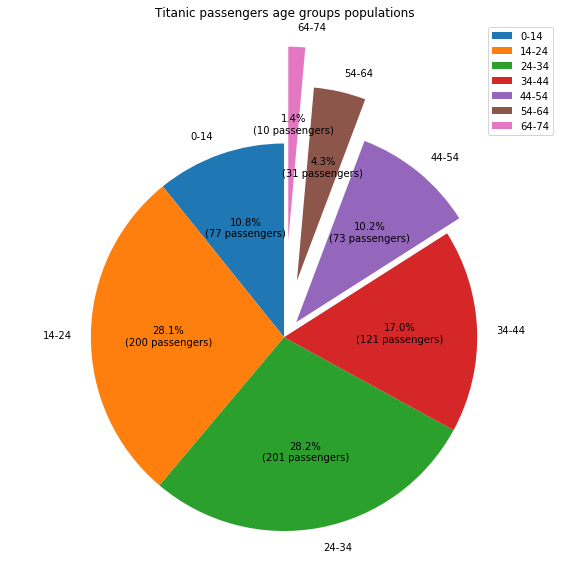

In [177]:
fig, axes = plt.subplots(figsize=(8, 8))
labels = ["0-14", "14-24", "24-34", "34-44", "44-54", "54-64", "64-74"]
explode = (0, 0, 0, 0.0, 0.1, 0.3, 0.5)
axes.pie(counted_values.values, labels=labels, explode=explode,
         autopct=lambda p: '{0:.1f}%\n({1:.0f} passengers)'.format(p, p * counted_values.values.sum() / 100), 
         shadow=False, startangle=90)
axes.set_title("Titanic passengers age groups populations")
axes.axis('equal');
axes.legend(labels=labels, loc="best")
fig.tight_layout()

So we see that majority of passengers (56.2%) was aged 14 to 34. 10.8% of passengers were aged below 14 years old. About 32% of passengers were aged above 44 years old.

Let's see mortality levels among different age groups.

In [182]:
# TODO: Refactor this with grouping and then plotting with function and looping.
survival_0_14_df = survival_df[survival_df["Age"] <= 14]
survival_14_24_df = survival_df[(survival_df["Age"] > 14) & (survival_df["Age"] <= 24)]
survival_24_34_df = survival_df[(survival_df["Age"] > 24) & (survival_df["Age"] <= 34)]
survival_34_44_df = survival_df[(survival_df["Age"] > 34) & (survival_df["Age"] <= 44)]
survival_44_54_df = survival_df[(survival_df["Age"] > 44) & (survival_df["Age"] <= 54)]
survival_54_64_df = survival_df[(survival_df["Age"] > 54) & (survival_df["Age"] <= 64)]
survival_64_74_df = survival_df[(survival_df["Age"] > 64) & (survival_df["Age"] <= 74)]

In [183]:
survided_0_14_number = sum(survival_0_14_df["Survived"] == 1)
not_survided_0_14_number = sum(survival_0_14_df["Survived"] == 0)

survided_14_24_number = sum(survival_14_24_df["Survived"] == 1)
not_survided_14_24_number = sum(survival_14_24_df["Survived"] == 0)

survided_24_34_number = sum(survival_24_34_df["Survived"] == 1)
not_survided_24_34_number = sum(survival_24_34_df["Survived"] == 0)

survided_34_44_number = sum(survival_34_44_df["Survived"] == 1)
not_survided_34_44_number = sum(survival_34_44_df["Survived"] == 0)

survided_44_54_number = sum(survival_44_54_df["Survived"] == 1)
not_survided_44_54_number = sum(survival_44_54_df["Survived"] == 0)

survided_54_64_number = sum(survival_54_64_df["Survived"] == 1)
not_survided_54_64_number = sum(survival_54_64_df["Survived"] == 0)

survided_64_74_number = sum(survival_64_74_df["Survived"] == 1)
not_survided_64_74_number = sum(survival_64_74_df["Survived"] == 0)


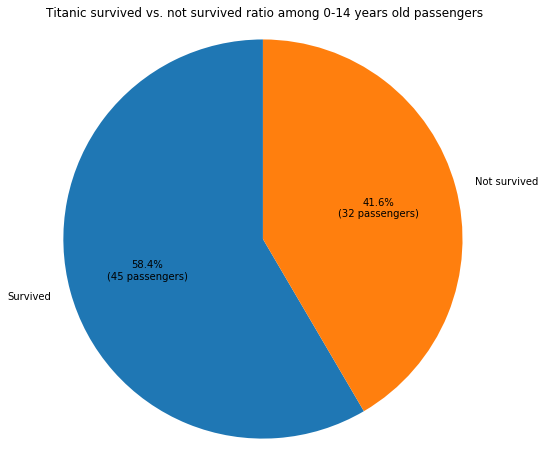

In [205]:
plot_survival_rate(survided_0_14_number, not_survided_0_14_number, "0-14 years old passengers")


## Notes

Then identify the group with the highest mortality. Identify set of factors affecting it. Try all combinations possible.